In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set_theme(style="whitegrid", palette="muted")

In [100]:
df_final_demo = pd.read_csv("/Users/levgi/Desktop/Ironhack/Week5/Project W4-5/vanguard-project/raw_data/df_final_demo.txt", delimiter=",")
df_final_exp = pd.read_csv("/Users/levgi/Desktop/Ironhack/Week5/Project W4-5/vanguard-project/raw_data/df_final_experiment_clients.txt", delimiter=",")
df_final_web_pt1 = pd.read_csv("/Users/levgi/Desktop/Ironhack/Week5/Project W4-5/vanguard-project/raw_data/df_final_web_data_pt_1.txt", delimiter=",")
df_final_web_pt2 = pd.read_csv("/Users/levgi/Desktop/Ironhack/Week5/Project W4-5/vanguard-project/raw_data/df_final_web_data_pt_2.txt", delimiter=",")

In [101]:
df_final_web_data = pd.concat([df_final_web_pt1, df_final_web_pt2], ignore_index=True)
df_final_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [102]:
df_merged = df_final_demo.merge(df_final_exp, on="client_id", how="left")
df_merged

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [103]:
df_merged.info(), df_merged.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
 9   Variation         50500 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 5.4+ MB


(None,
 client_id               0
 clnt_tenure_yr         14
 clnt_tenure_mnth       14
 clnt_age               15
 gendr                  14
 num_accts              14
 bal                    14
 calls_6_mnth           14
 logons_6_mnth          14
 Variation           20109
 dtype: int64)

c:\Users\levgi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


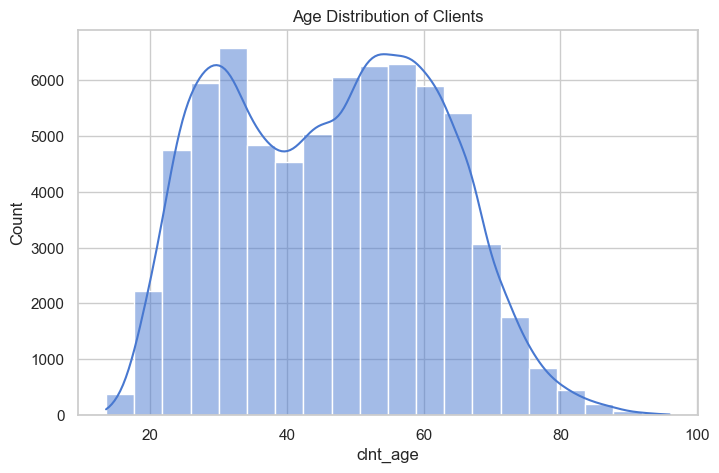

In [104]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df_merged["clnt_age"], bins=20, kde=True)
plt.title("Age Distribution of Clients")
plt.show()

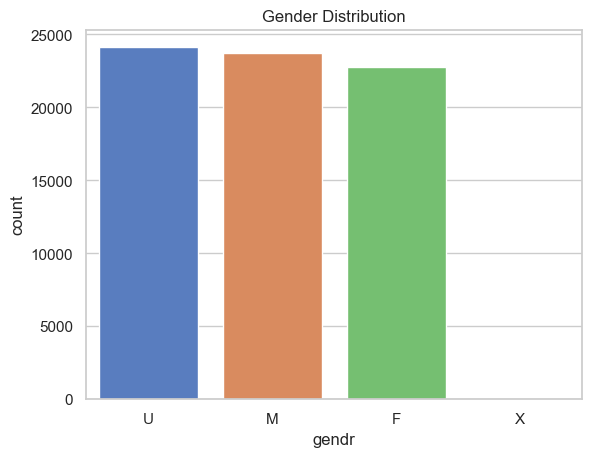

In [105]:
sns.countplot(data=df_merged, x="gendr")
plt.title("Gender Distribution")
plt.show()

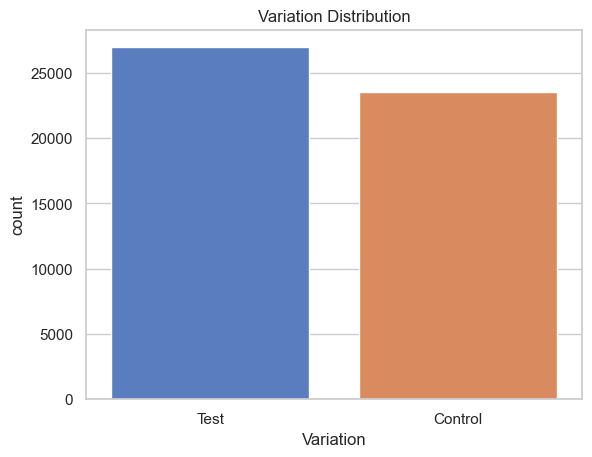

In [106]:
sns.countplot(data=df_merged, x="Variation")
plt.title("Variation Distribution")
plt.show()

In [107]:
df_final_web_data["date_time"] = pd.to_datetime(df_final_web_data["date_time"])
df_final_web_data["Date"] = df_final_web_data["date_time"].dt.date
df_final_web_data["Time"] = df_final_web_data["date_time"].dt.time

In [108]:
df_final_web_data.head()  # Display the first few rows of the web data

,client_id,visitor_id,visit_id,process_step,date_time,Date,Time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17,15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17,15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17,15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17,15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17,15:18:04


In [109]:
df_merged

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


c:\Users\levgi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


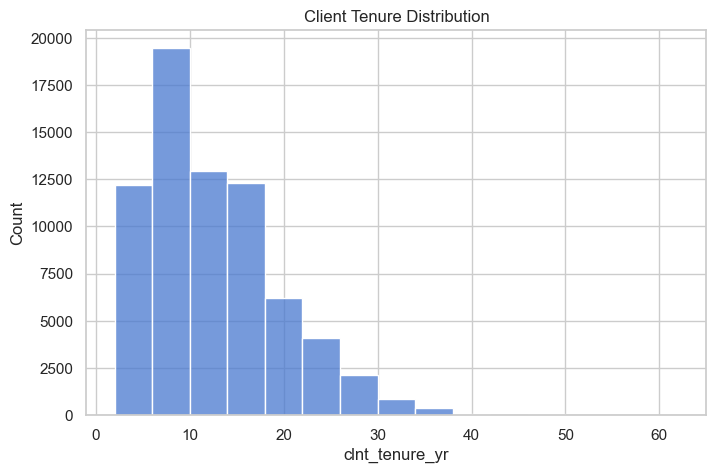

In [110]:
# Tenure (years with Vanguard)

plt.figure(figsize=(8,5))
sns.histplot(df_merged["clnt_tenure_yr"], bins=15, kde=False)
plt.title("Client Tenure Distribution")
plt.show()

In [111]:
df_merged["tenure_category"] = np.where(df_merged["clnt_tenure_yr"] < 5, "New", "Long-standing") # Categorizing tenure
df_merged["tenure_category"].value_counts()

tenure_category
Long-standing    65392
New               5217
Name: count, dtype: int64

In [112]:
df_merged.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,tenure_category
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,Long-standing
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,Long-standing
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,Long-standing
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,Long-standing
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,Long-standing


In [113]:
df_final_web_data.head(10)  # Display the first few rows of the web data

,client_id,visitor_id,visit_id,process_step,date_time,Date,Time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17,15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17,15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17,15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17,15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17,15:18:04
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15,2017-04-17,15:17:15
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01,2017-04-17,15:17:01
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22,2017-04-17,15:16:22
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05,2017-04-05,13:10:05
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43,2017-04-05,13:09:43


In [114]:
completed_clients = df_final_web_data[df_final_web_data["process_step"]=="confirm"]["client_id"].unique()
df_merged["completed"] = df_merged["client_id"].isin(completed_clients).astype(int)

completion_rate = df_merged.groupby("client_id")["completed"].mean()
completion_rate

client_id
169        1.0
555        1.0
647        1.0
722        1.0
934        0.0
          ... 
9999400    1.0
9999626    0.0
9999729    1.0
9999832    0.0
9999839    1.0
Name: completed, Length: 70609, dtype: float64

In [115]:
df_merged.head(2)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,tenure_category,completed
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,Long-standing,1
1,2304905,7.0,94.0,58.0,U,2.0,110860.3,6.0,9.0,Control,Long-standing,1


C:\Users\levgi\AppData\Local\Temp\ipykernel_7544\2408433495.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_completion = df_merged.groupby("age_group")["completed"].mean().reset_index()
c:\Users\levgi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


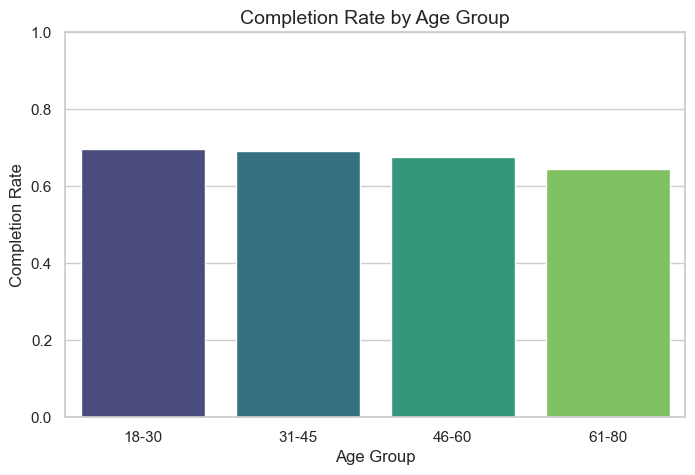

In [116]:
df_merged["age_group"] = pd.cut(df_merged["clnt_age"], bins=[18,30,45,60,80], labels=["18-30","31-45","46-60","61-80"])

age_completion = df_merged.groupby("age_group")["completed"].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=age_completion, x="age_group", y="completed", palette="viridis")
plt.title("Completion Rate by Age Group", fontsize=14)
plt.ylabel("Completion Rate")
plt.ylim(0,1)
plt.xlabel("Age Group")
plt.show()

C:\Users\levgi\AppData\Local\Temp\ipykernel_7544\2036891681.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  completion_by_age = df_merged.groupby(["age_group", "Variation"])["completed"].mean().reset_index()
c:\Users\levgi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\levgi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=Tr

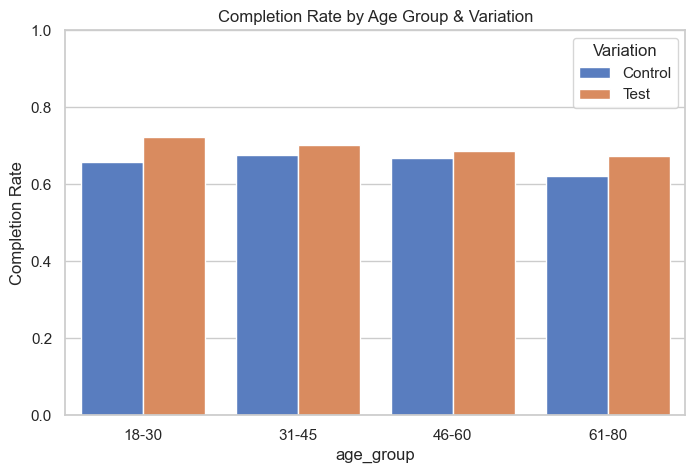

In [117]:
completion_by_age = df_merged.groupby(["age_group", "Variation"])["completed"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=completion_by_age, x="age_group", y="completed", hue="Variation")
plt.title("Completion Rate by Age Group & Variation")
plt.ylabel("Completion Rate")
plt.ylim(0,1)
plt.show()

In [118]:
overall_completion = df_merged["completed"].mean()
print("Overall Completion Rate:", round(overall_completion*100, 2), "%") 
# Overall completion rate. mean() returns the average of the 'completed' column, which is 1 for completed clients and 0 for non-completed clients

Overall Completion Rate: 67.7 %


In [119]:
# Completion rate by variation(experiment groups)
completion_by_variation = df_merged.groupby("Variation")["completed"].mean().reset_index()
completion_by_variation

,Variation,completed
0,Control,0.655873
1,Test,0.692932


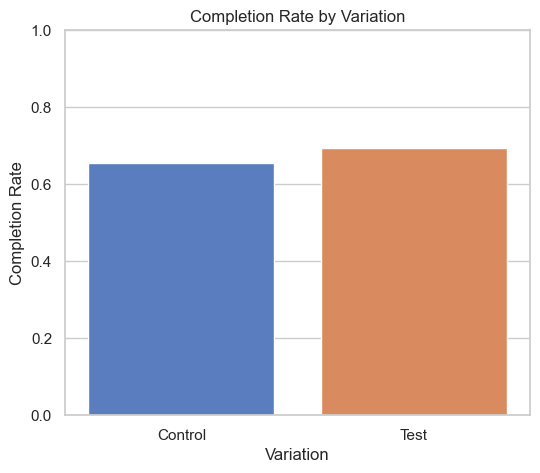

In [120]:
plt.figure(figsize=(6,5))
sns.barplot(data=completion_by_variation, x="Variation", y="completed")
plt.title("Completion Rate by Variation")
plt.ylabel("Completion Rate")
plt.ylim(0,1) # Set y-axis limits to [0, 1] for better visualization
plt.show()

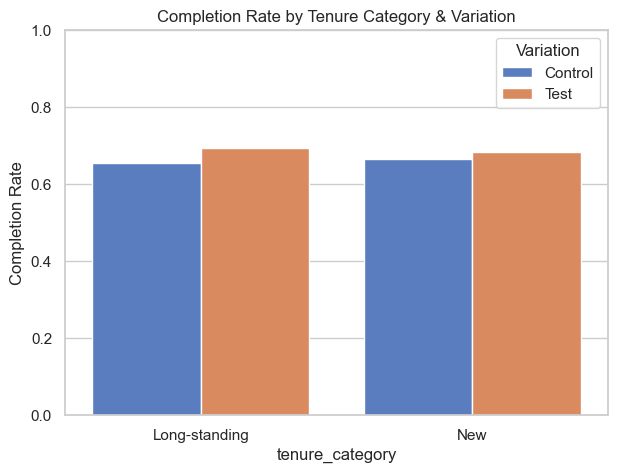

In [121]:
completion_by_tenure = df_merged.groupby(["tenure_category", "Variation"])["completed"].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=completion_by_tenure, x="tenure_category", y="completed", hue="Variation")
plt.title("Completion Rate by Tenure Category & Variation")
plt.ylabel("Completion Rate")
plt.ylim(0,1)
plt.show()

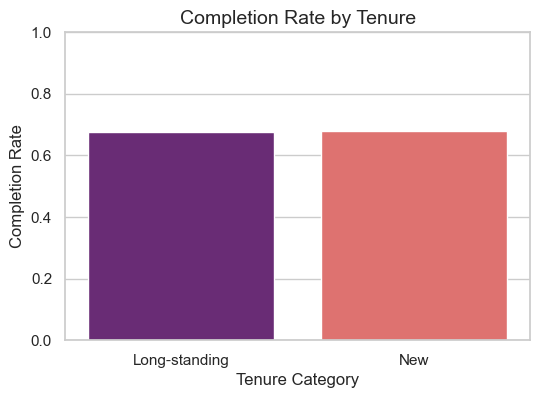

In [122]:
tenure_completion = df_merged.groupby("tenure_category")["completed"].mean().reset_index()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(data=tenure_completion, x="tenure_category", y="completed", palette="magma")
plt.title("Completion Rate by Tenure", fontsize=14)
plt.ylabel("Completion Rate")
plt.ylim(0,1)
plt.xlabel("Tenure Category")
plt.show()

In [123]:
tenure_completion

,tenure_category,completed
0,Long-standing,0.676841
1,New,0.678551


Time spent on each step

In [124]:
df_final_web_data.head()  # Display the first few rows of the web data

,client_id,visitor_id,visit_id,process_step,date_time,Date,Time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17,15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17,15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17,15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17,15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17,15:18:04


In [125]:
### extract the number from process_step - extract digits (if any)
df_final_web_data['step_num'] = df_final_web_data['process_step'].str.extract('(\d+)')

### handle string step: start = 0, confirm = 4
df_final_web_data.loc[df_final_web_data['process_step'] == 'start', 'step_num'] = 0
df_final_web_data.loc[df_final_web_data['process_step'] == 'confirm', 'step_num'] = 4

### convert safely to nullable integer
df_final_web_data['step_num'] = pd.to_numeric(df_final_web_data['step_num'], errors='coerce').astype('Int64')

### put in order by client_id, visit_id, date_time 
df_final_web_data = df_final_web_data.sort_values(by=['client_id', 'visit_id', 'date_time'])

### find and flag backward movements as errors
df_final_web_data['error_flag'] = (
    df_final_web_data
    .groupby(['client_id', 'visit_id'])['step_num']
    .diff()
    .apply(lambda x: 1 if pd.notna(x) and x < 0 else 0)
)

df_final_web_data

### 1 = error, backwards step
### 0 = no error, forward or same step

,client_id,visitor_id,visit_id,process_step,date_time,Date,Time,step_num,error_flag
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,2017-04-12,20:19:36,0,0
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12,20:19:45,1,0
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12,20:20:31,2,0
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12,20:22:05,3,0
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,2017-04-12,20:23:09,4,0
...,...,...,...,...,...,...,...,...,...
648533,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08,2017-06-01,22:40:08,1,0
648532,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28,2017-06-01,22:41:28,1,0
648531,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47,2017-06-01,22:41:47,2,0
648530,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58,2017-06-01,22:44:58,3,0


In [126]:
# define the step order as an array
step_order = ["start", "step_1", "step_2", "step_3", "confirm"]
df_final_web_data["process_step"] = pd.Categorical(df_final_web_data["process_step"], categories=step_order, ordered=True)

In [127]:
# Ensure datetime is correct
df_final_web_data["date_time"] = pd.to_datetime(df_final_web_data["date_time"])

# Sort by client, visit, and step order (not just timestamp)
df_final_web_data = df_final_web_data.sort_values(
    ["client_id", "visit_id", "step_num"]
)

# Calculate step duration
df_final_web_data["step_duration"] = (
    df_final_web_data.groupby(["client_id", "visit_id"])["date_time"]
    .diff()
    .dt.total_seconds()
)

# Average step duration
avg_step_duration = (
    df_final_web_data.groupby("process_step")["step_duration"]
    .mean()
    .reset_index()
)

avg_step_duration

C:\Users\levgi\AppData\Local\Temp\ipykernel_7544\1112249525.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_final_web_data.groupby("process_step")["step_duration"]


,process_step,step_duration
0,start,194.603802
1,step_1,7.515681
2,step_2,29.256520
3,step_3,83.450609
4,confirm,129.909461


c:\Users\levgi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


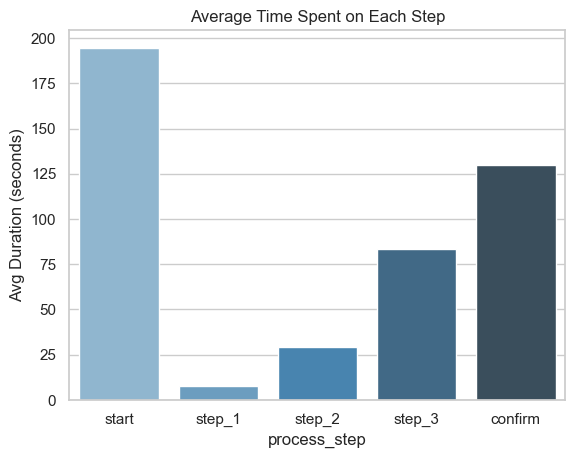

In [128]:
sns.barplot(
    data=avg_step_duration,
    x="process_step",
    y="step_duration",
    palette="Blues_d"
)
plt.title("Average Time Spent on Each Step")
plt.ylabel("Avg Duration (seconds)")
plt.show()

In [129]:
df_final_web_data['process_step'].isnull().any()

False

In [130]:
df_final_web_data['error_flag'].value_counts()

error_flag
0    692445
1     62960
Name: count, dtype: int64

In [131]:
### calculating the error rate

error_rate = df_final_web_data['error_flag'].mean() * 100
print(error_rate)

8.334601968480484


In [132]:
# Make sure step_duration exists
df_final_web_data["date_time"] = pd.to_datetime(df_final_web_data["date_time"])
df_final_web_data = df_final_web_data.sort_values(["client_id", "visit_id", "step_num"])
df_final_web_data["step_duration"] = (
    df_final_web_data.groupby(["client_id", "visit_id"])["date_time"].diff().dt.total_seconds()
)

In [133]:
### merging the two dataframes to 'df_combined'

df_combined = pd.merge(
    df_final_web_data,
    df_merged,
    on='client_id',
    how='left'
)

In [134]:
df_combined.head()

,client_id,visitor_id,visit_id,process_step,date_time,Date,Time,step_num,error_flag,step_duration,...,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,tenure_category,completed,age_group
0,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,2017-04-12,20:19:36,0,0,NaN,...,47.5,M,2.0,501570.72,4.0,4.0,NaN,Long-standing,1.0,46-60
1,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12,20:19:45,1,0,9.0,...,47.5,M,2.0,501570.72,4.0,4.0,NaN,Long-standing,1.0,46-60
2,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12,20:20:31,2,0,46.0,...,47.5,M,2.0,501570.72,4.0,4.0,NaN,Long-standing,1.0,46-60
3,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12,20:22:05,3,0,94.0,...,47.5,M,2.0,501570.72,4.0,4.0,NaN,Long-standing,1.0,46-60
4,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,2017-04-12,20:23:09,4,0,64.0,...,47.5,M,2.0,501570.72,4.0,4.0,NaN,Long-standing,1.0,46-60


In [135]:
df_combined["Variation"].isna().sum()

434096

In [136]:
# Proportion of missing Variation
missing_ratio = df_combined["Variation"].isna().mean()
missing_ratio

0.5746533316565287

57 % OF THE ROWS HAS NaN VALUES ON VARIATION COLUMN. MAYBE WE CAN LABEL THEM AS UNKNOWN INSTEAD OF DROPPING

In [137]:
df_combined = df_combined.dropna(subset=["Variation"])


COMBINED COMPARISONS

TENURE

In [138]:
tenure_completion_combined = (
    df_combined.groupby("tenure_category")["completed"]
    .mean()
    .reset_index()
)
tenure_completion_combined

,tenure_category,completed
0,Long-standing,0.765658
1,New,0.770254


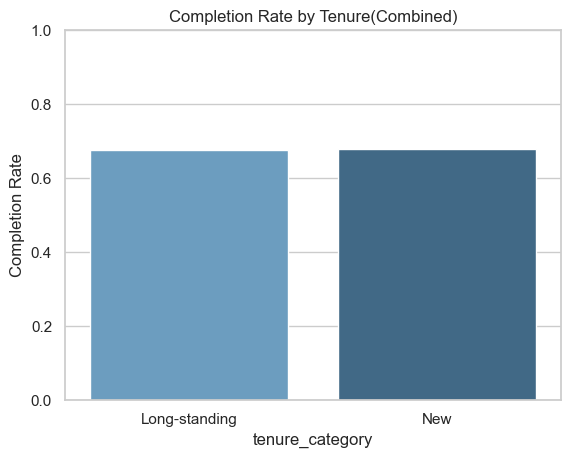

In [139]:
sns.barplot(
    data=tenure_completion,
    x="tenure_category",
    y="completed",
    palette="Blues_d"
)
plt.title("Completion Rate by Tenure(Combined)")
plt.ylabel("Completion Rate")
plt.ylim(0, 1)
plt.show()

COMPLETION PER VISIT

In [140]:
completion_per_visit = df_combined.groupby(['visit_id', 'Variation'])['completed'].max().reset_index()
completion_rate_variation = completion_per_visit.groupby('Variation')['completed'].mean()
completion_rate_variation

Variation
Control    0.672901
Test       0.710066
Name: completed, dtype: float64

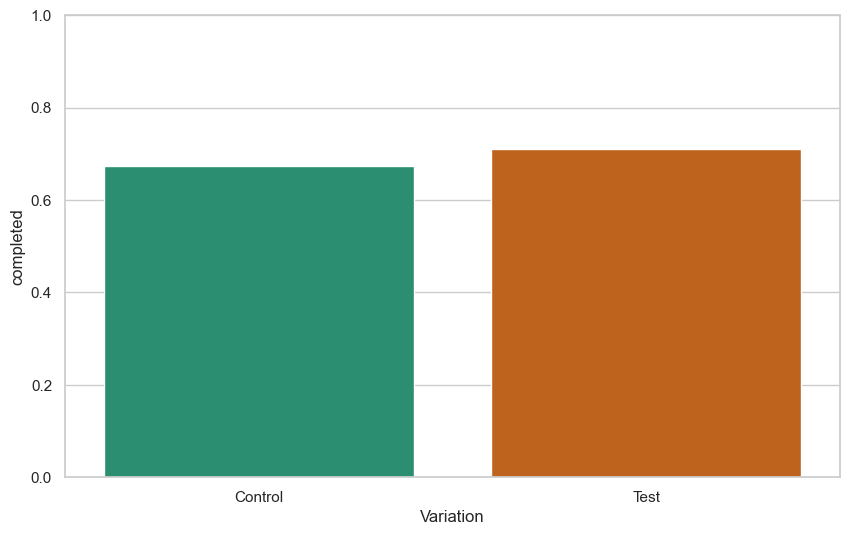

In [141]:
completion_per_visit = df_combined.groupby(['visit_id', 'Variation'])['completed'].max().reset_index()
completion_rate_variation = completion_per_visit.groupby('Variation')['completed'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=completion_rate_variation, x="Variation", y="completed", palette="Dark2")
plt.ylim(0, 1)
plt.show()

TENURE AND VARIATION COMBINED

In [142]:
tenure_var_completion = (
    df_combined.groupby(["tenure_category", "Variation"])["completed"]
    .mean()
    .reset_index()
)
tenure_var_completion

,tenure_category,Variation,completed
0,Long-standing,Control,0.766509
1,Long-standing,Test,0.764973
2,New,Control,0.785017
3,New,Test,0.758051


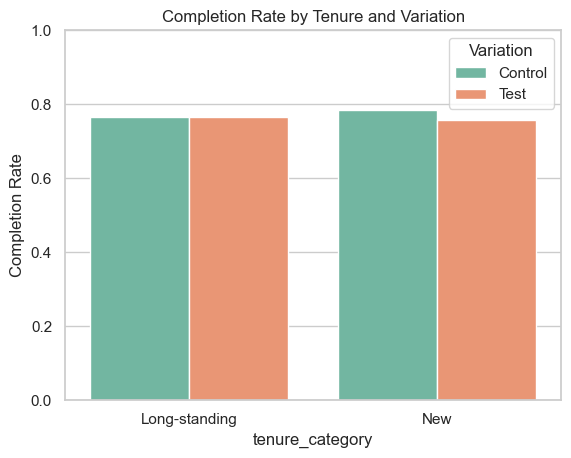

In [143]:
sns.barplot(
    data=tenure_var_completion,
    x="tenure_category",
    y="completed",
    hue="Variation",
    palette="Set2"
)
plt.title("Completion Rate by Tenure and Variation")
plt.ylabel("Completion Rate")
plt.ylim(0, 1)
plt.show()

BY AGE GROUP

In [144]:
age_completion_combined = (
    df_combined.groupby("age_group")["completed"]
    .mean()
    .reset_index()
)
age_completion_combined

C:\Users\levgi\AppData\Local\Temp\ipykernel_7544\4214901016.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_combined.groupby("age_group")["completed"]


,age_group,completed
0,18-30,0.799572
1,31-45,0.790365
2,46-60,0.764308
3,61-80,0.728038


c:\Users\levgi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


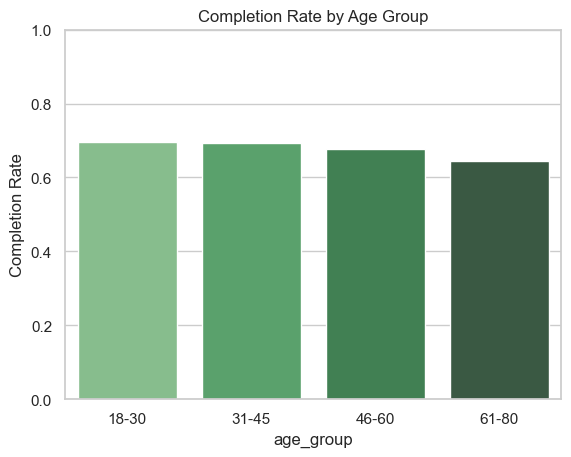

In [145]:
sns.barplot(
    data=age_completion,
    x="age_group",
    y="completed",
    palette="Greens_d"
)
plt.title("Completion Rate by Age Group")
plt.ylabel("Completion Rate")
plt.ylim(0, 1)
plt.show()

C:\Users\levgi\AppData\Local\Temp\ipykernel_7544\1371925101.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_combined.groupby(["process_step", "age_group"])["step_duration"]
c:\Users\levgi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


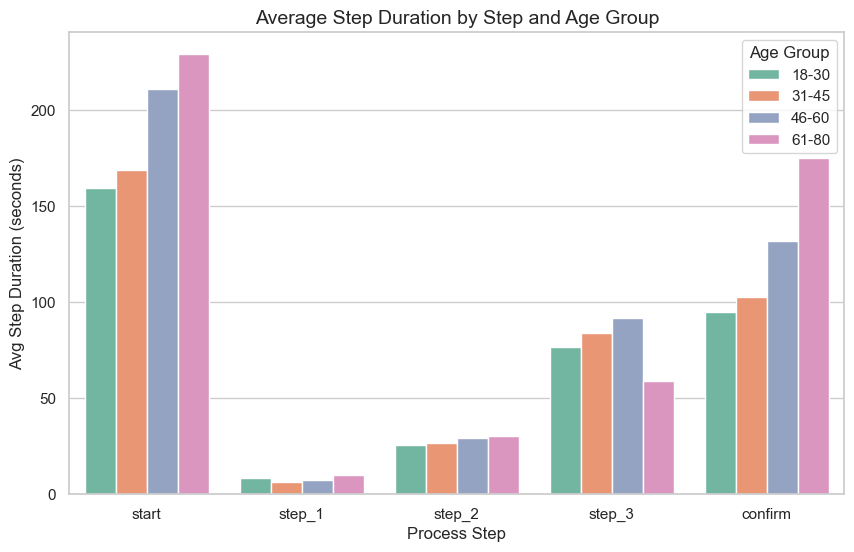

In [146]:
step_age = (
    df_combined.groupby(["process_step", "age_group"])["step_duration"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=step_age, 
    x="process_step", y="step_duration", hue="age_group", palette="Set2"
)
plt.title("Average Step Duration by Step and Age Group", fontsize=14)
plt.ylabel("Avg Step Duration (seconds)")
plt.xlabel("Process Step")
plt.legend(title="Age Group")
plt.show()

C:\Users\levgi\AppData\Local\Temp\ipykernel_7544\1438104962.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_combined.groupby(["process_step", "tenure_category"])["step_duration"]
c:\Users\levgi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\levgi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future def

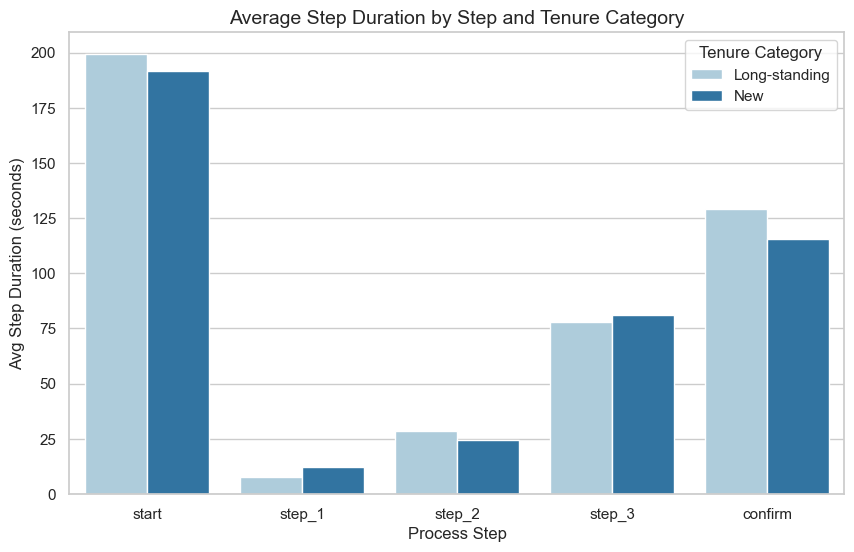

In [147]:
step_tenure = (
    df_combined.groupby(["process_step", "tenure_category"])["step_duration"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=step_tenure, 
    x="process_step", y="step_duration", hue="tenure_category", palette="Paired"
)
plt.title("Average Step Duration by Step and Tenure Category", fontsize=14)
plt.ylabel("Avg Step Duration (seconds)")
plt.xlabel("Process Step")
plt.legend(title="Tenure Category")
plt.show()

C:\Users\levgi\AppData\Local\Temp\ipykernel_7544\830390055.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_combined.groupby(["process_step", "Variation"])["step_duration"]
c:\Users\levgi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\levgi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default an

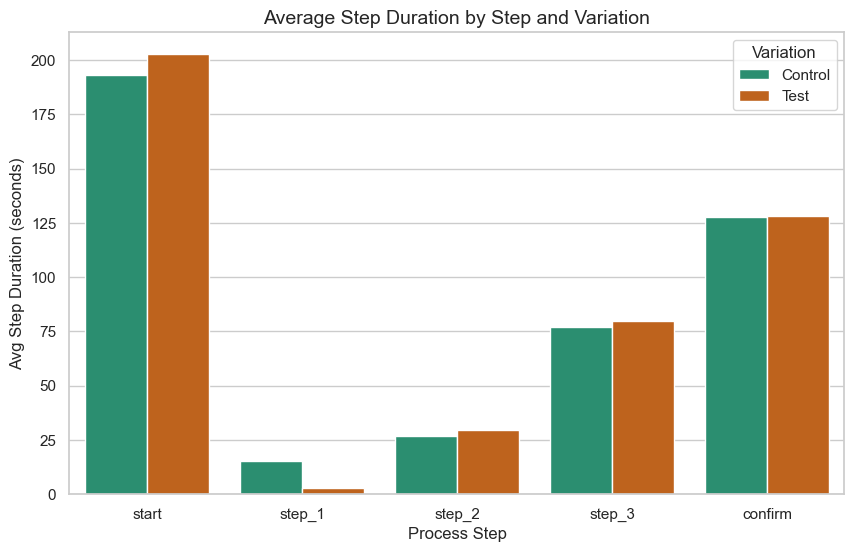

In [148]:
step_variation = (
    df_combined.groupby(["process_step", "Variation"])["step_duration"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=step_variation, 
    x="process_step", y="step_duration", hue="Variation", palette="Dark2"
)
plt.title("Average Step Duration by Step and Variation", fontsize=14)
plt.ylabel("Avg Step Duration (seconds)")
plt.xlabel("Process Step")
plt.legend(title="Variation")
plt.show()

C:\Users\levgi\AppData\Local\Temp\ipykernel_7544\867181441.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_combined.groupby(["process_step", "Variation"])["error_flag"]
c:\Users\levgi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\levgi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and s

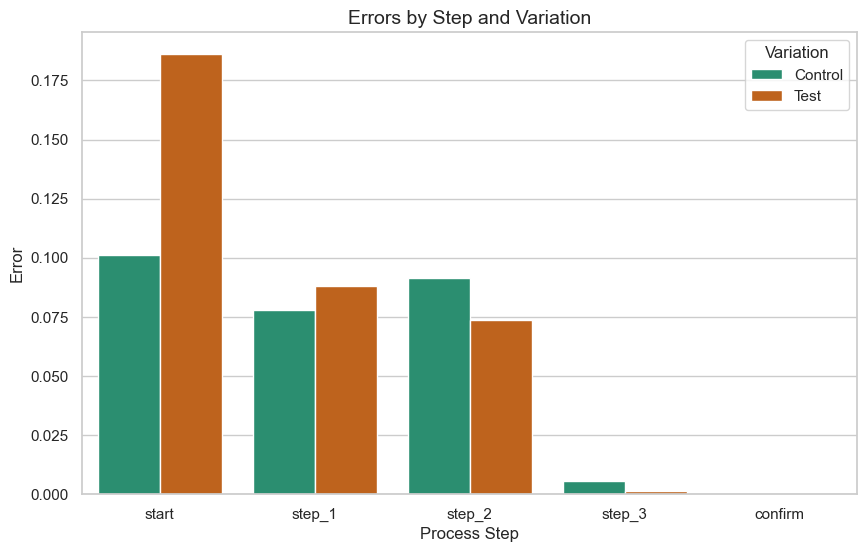

In [149]:
step_variation = (
    df_combined.groupby(["process_step", "Variation"])["error_flag"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=step_variation, 
    x="process_step", y="error_flag", hue="Variation", palette="Dark2"
)
plt.title("Errors by Step and Variation", fontsize=14)
plt.ylabel("Error")
plt.xlabel("Process Step")
plt.legend(title="Variation")
plt.show()

INSIGHTS

Test version takes slightly longer than Control.

Test version is more error prone than Control.

Users are tend to complete the Test version more. Test: %71 , Control: %67

Users are used to the older version, therefore test version has longer comp. time and more errors.

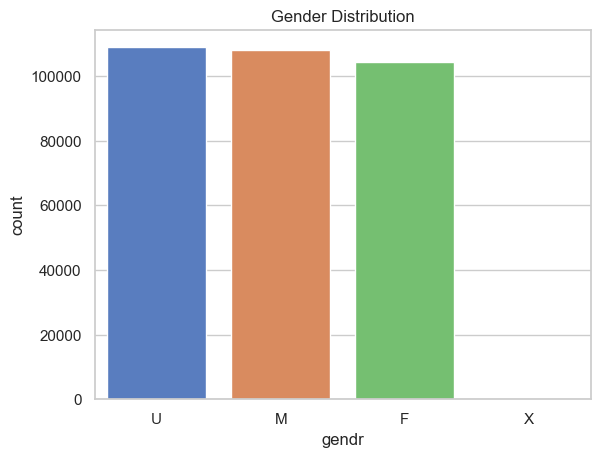

In [150]:
sns.countplot(data=df_combined, x="gendr")
plt.title("Gender Distribution")
plt.show()

NEXT STEPS

Null Hypothesis (H₀)

Alternative Hypothesis (H₁)

Significance level (0,05)

Statistical test 

Calculate p-value

In [151]:
df_combined.head(10)

,client_id,visitor_id,visit_id,process_step,date_time,Date,Time,step_num,error_flag,step_duration,...,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,tenure_category,completed,age_group
12,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,2017-04-15,12:57:56,0,0,NaN,...,29.5,U,2.0,25454.66,2.0,6.0,Test,New,1.0,18-30
13,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,2017-04-15,12:58:03,1,0,7.0,...,29.5,U,2.0,25454.66,2.0,6.0,Test,New,1.0,18-30
14,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,2017-04-15,12:58:35,2,0,32.0,...,29.5,U,2.0,25454.66,2.0,6.0,Test,New,1.0,18-30
15,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,2017-04-15,13:00:14,3,0,99.0,...,29.5,U,2.0,25454.66,2.0,6.0,Test,New,1.0,18-30
16,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,2017-04-15,13:00:34,4,0,20.0,...,29.5,U,2.0,25454.66,2.0,6.0,Test,New,1.0,18-30
17,647,66758770_53988066587,40369564_40101682850_311847,start,2017-04-12 15:41:28,2017-04-12,15:41:28,0,0,NaN,...,57.5,M,2.0,30525.80,0.0,4.0,Test,Long-standing,1.0,46-60
18,647,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,2017-04-12,15:41:35,1,0,7.0,...,57.5,M,2.0,30525.80,0.0,4.0,Test,Long-standing,1.0,46-60
19,647,66758770_53988066587,40369564_40101682850_311847,step_2,2017-04-12 15:41:53,2017-04-12,15:41:53,2,0,18.0,...,57.5,M,2.0,30525.80,0.0,4.0,Test,Long-standing,1.0,46-60
20,647,66758770_53988066587,40369564_40101682850_311847,step_3,2017-04-12 15:45:02,2017-04-12,15:45:02,3,0,189.0,...,57.5,M,2.0,30525.80,0.0,4.0,Test,Long-standing,1.0,46-60
21,647,66758770_53988066587,40369564_40101682850_311847,confirm,2017-04-12 15:47:45,2017-04-12,15:47:45,4,0,163.0,...,57.5,M,2.0,30525.80,0.0,4.0,Test,Long-standing,1.0,46-60


In [152]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_combined['Variation'], df_combined['completed'])

print(contingency_table)

### 1 = completed
### 0 = not completed

completed    0.0     1.0
Variation               
Control    33300  110162
Test       41888  135959


In [153]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)
print("Expected frequencies:\n", expected)

alpha = 0.05
if p < alpha:
    print("Reject H0: Completion depends on group (Test > Control).")
else:
    print("Fail to reject H0.")

Chi-square statistic: 5.135549497418362
Degrees of freedom: 1
P-value: 0.023440665718217426
Expected frequencies:
 [[ 33570.86435799 109891.13564201]
 [ 41617.13564201 136229.86435799]]
Reject H0: Completion depends on group (Test > Control).


In [154]:
df_combined.head()

,client_id,visitor_id,visit_id,process_step,date_time,Date,Time,step_num,error_flag,step_duration,...,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,tenure_category,completed,age_group
12,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,2017-04-15,12:57:56,0,0,NaN,...,29.5,U,2.0,25454.66,2.0,6.0,Test,New,1.0,18-30
13,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,2017-04-15,12:58:03,1,0,7.0,...,29.5,U,2.0,25454.66,2.0,6.0,Test,New,1.0,18-30
14,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,2017-04-15,12:58:35,2,0,32.0,...,29.5,U,2.0,25454.66,2.0,6.0,Test,New,1.0,18-30
15,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,2017-04-15,13:00:14,3,0,99.0,...,29.5,U,2.0,25454.66,2.0,6.0,Test,New,1.0,18-30
16,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,2017-04-15,13:00:34,4,0,20.0,...,29.5,U,2.0,25454.66,2.0,6.0,Test,New,1.0,18-30


In [155]:
### 

error_rate_per_step = df_final_web_data.groupby('step_num')['error_flag'].mean()
print(error_rate_per_step)

step_num
0    0.159470
1    0.088031
2    0.070922
3    0.002272
4    0.000000
Name: error_flag, dtype: float64


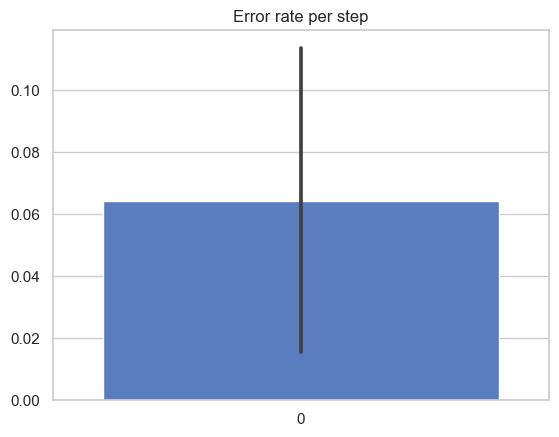

In [156]:
sns.barplot(data = error_rate_per_step)
plt.title("Error rate per step")
plt.show()

In [ ]:
# Label the steps as numbers
step_labels = {
    0: "start",
    1: "step_1",
    2: "step_2",
    3: "step_3",
    4: "confirm"
}

# Add a column with labels
error_rate_step_var["step_name"] = error_rate_step_var["step_num"].map(step_labels)

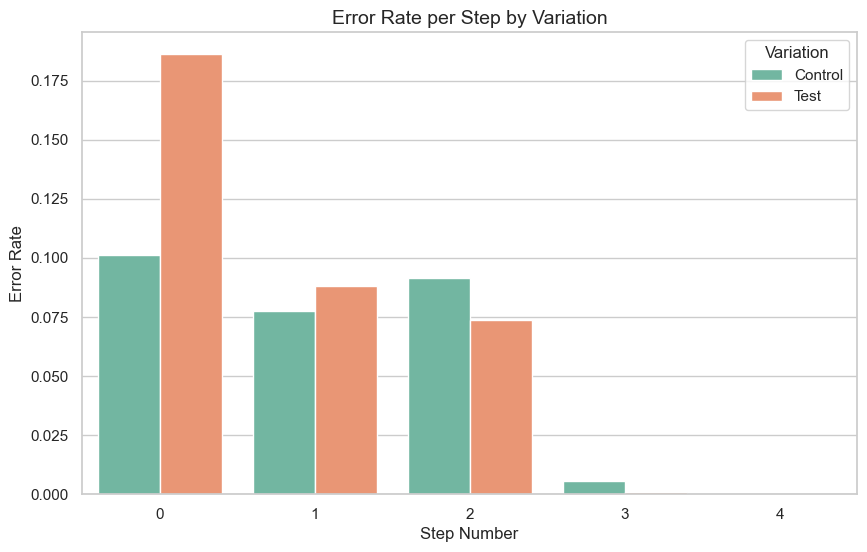

In [167]:
error_rate_step_var = (
    df_combined.groupby(['step_num', 'Variation'])['error_flag']
    .mean()
    .reset_index()
)


plt.figure(figsize=(10,6))
sns.barplot(
    data=error_rate_step_var,
    x="step_num",
    y="error_flag",
    hue="Variation",   # separate bars for each variation
    palette="Set2"
)

plt.title("Error Rate per Step by Variation", fontsize=14)
plt.ylabel("Error Rate")
plt.xlabel("Step Number")
plt.legend(title="Variation")

plt.show()

In [162]:
print(error_rate_step_var.head())
print(error_rate_step_var.columns)

   step_num Variation  error_flag
0         0   Control    0.101117
1         0      Test    0.186174
2         1   Control    0.077659
3         1      Test    0.088114
4         2   Control    0.091439
Index(['step_num', 'Variation', 'error_flag'], dtype='object')
